### Tree Counting using Local Maxima

This an attempt to automatically counting the tree based on local maxima package from skimage.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from skimage import exposure

Import the Canopy Height Model (CHM) dataset into python using GDAL

In [2]:
raster = 'test_data.tif'
img = gdal.Open(raster,gdal.GA_ReadOnly)
img = img.ReadAsArray()
image = np.array(img, dtype=float)

rescale image to percentile, in case we need to plot it.

In [3]:
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(image, in_range=(p2, p98))

Local maximum filtering willbe applied based using ndimage.maximum_filter() 

In [4]:
image_max = ndi.maximum_filter(image, size=3, mode='constant')

Locate maximum point based on peak_local_max

In [5]:
coordinates = peak_local_max(image, min_distance=2)
X=coordinates[:, 1]
y=coordinates[:, 0]

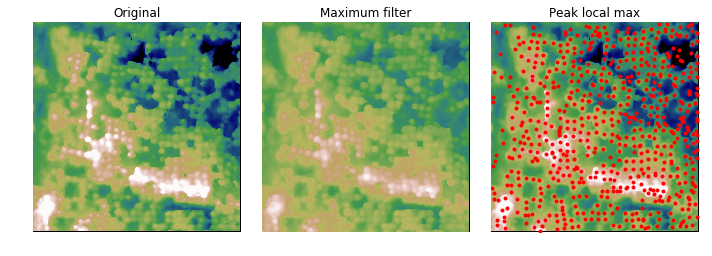

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 10), sharex=True, sharey=True)
cmap=plt.cm.gist_earth
ax = axes.ravel()
ax[0].imshow(img_rescale, cmap)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(img_rescale, cmap)
ax[2].autoscale(False)
ax[2].plot(X,y, 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()
plt.show()